# Siemens - Case Study Solution

Selected objective: (2) Build a 6-month forecast of the monthly sum of the variable VALUE_EUR for all HKONT values.

In [1]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Exploratory Data Analysis

In [2]:
pd.set_option('display.max_columns', 100)

# loading given data
data = pd.read_csv('training_data.csv')

In [3]:
display(data)

,MANDT,BUKRS,GJAHR,HKONT,KUNNR,PRCTR,KNA1_LAND1,KNA1_ORT01,ZTERM,DUE_DATE_SOURCE,VALUE_EUR,MWSTS,MWST2,BLART,T003T_LTEXT,TBSLT_LTEXT,MANSP,CTLPC,HISTORICRATING,CURRENTRATING,DATUM,DUE_DATE,GJAHR2,DOCUMENT_DATE,PAYMENT_DATE
0,310,3,2018,11,18724,1,NL,KATWIJK,63,ZBD2T,607,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,NaN,NaN,NaN,2017-12-01,2017-12-23,2019,1.512086e+15,20180109
1,310,3,2018,11,19521,1,NL,WARNSVELD,63,ZBD2T,1,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,NaN,NaN,NaN,2018-01-02,2018-01-10,2016,1.514851e+15,20180109
2,310,3,2018,11,5420,1,NL,OSS,63,ZBD2T,14,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,NaN,NaN,NaN,2017-12-01,2017-12-27,2019,1.512086e+15,20180109
3,310,3,2018,11,18724,1,NL,KATWIJK,63,ZBD2T,50,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,NaN,NaN,NaN,2018-01-02,2018-01-27,2016,1.514851e+15,20180109
4,310,3,2018,11,5420,1,NL,OSS,63,ZBD2T,27,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,NaN,NaN,NaN,2018-01-02,2018-01-07,2016,1.514851e+15,20180109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266088,310,4,2019,1,10946,34,NO,STANGE,25,ZBD1T,6,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,3.0,R4+,R6+,2019-02-01,2019-02-13,2018,1.548979e+15,20190215
266089,310,4,2019,1,10983,34,NO,PORSGRUNN,29,ZBD1T,6,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,3.0,R7+,R7+,2019-02-01,2019-02-13,2019,1.548979e+15,20190215
266090,310,4,2019,1,22904,34,NO,OSLO,29,ZBD1T,49,0.0,0.0,ZF,Partial Bill. SD,Invoice,NaN,3.0,R7+,R7+,2019-01-02,2019-01-13,2019,1.546387e+15,20190215
266091,310,4,2019,1,12221,34,NO,LYSAKER,25,ZBD1T,75,0.0,0.0,RV,Billing doc.transfer,Invoice,NaN,3.0,R4-,R5-,2019-02-01,2019-01-28,2015,1.548979e+15,20190215


<Axes: >

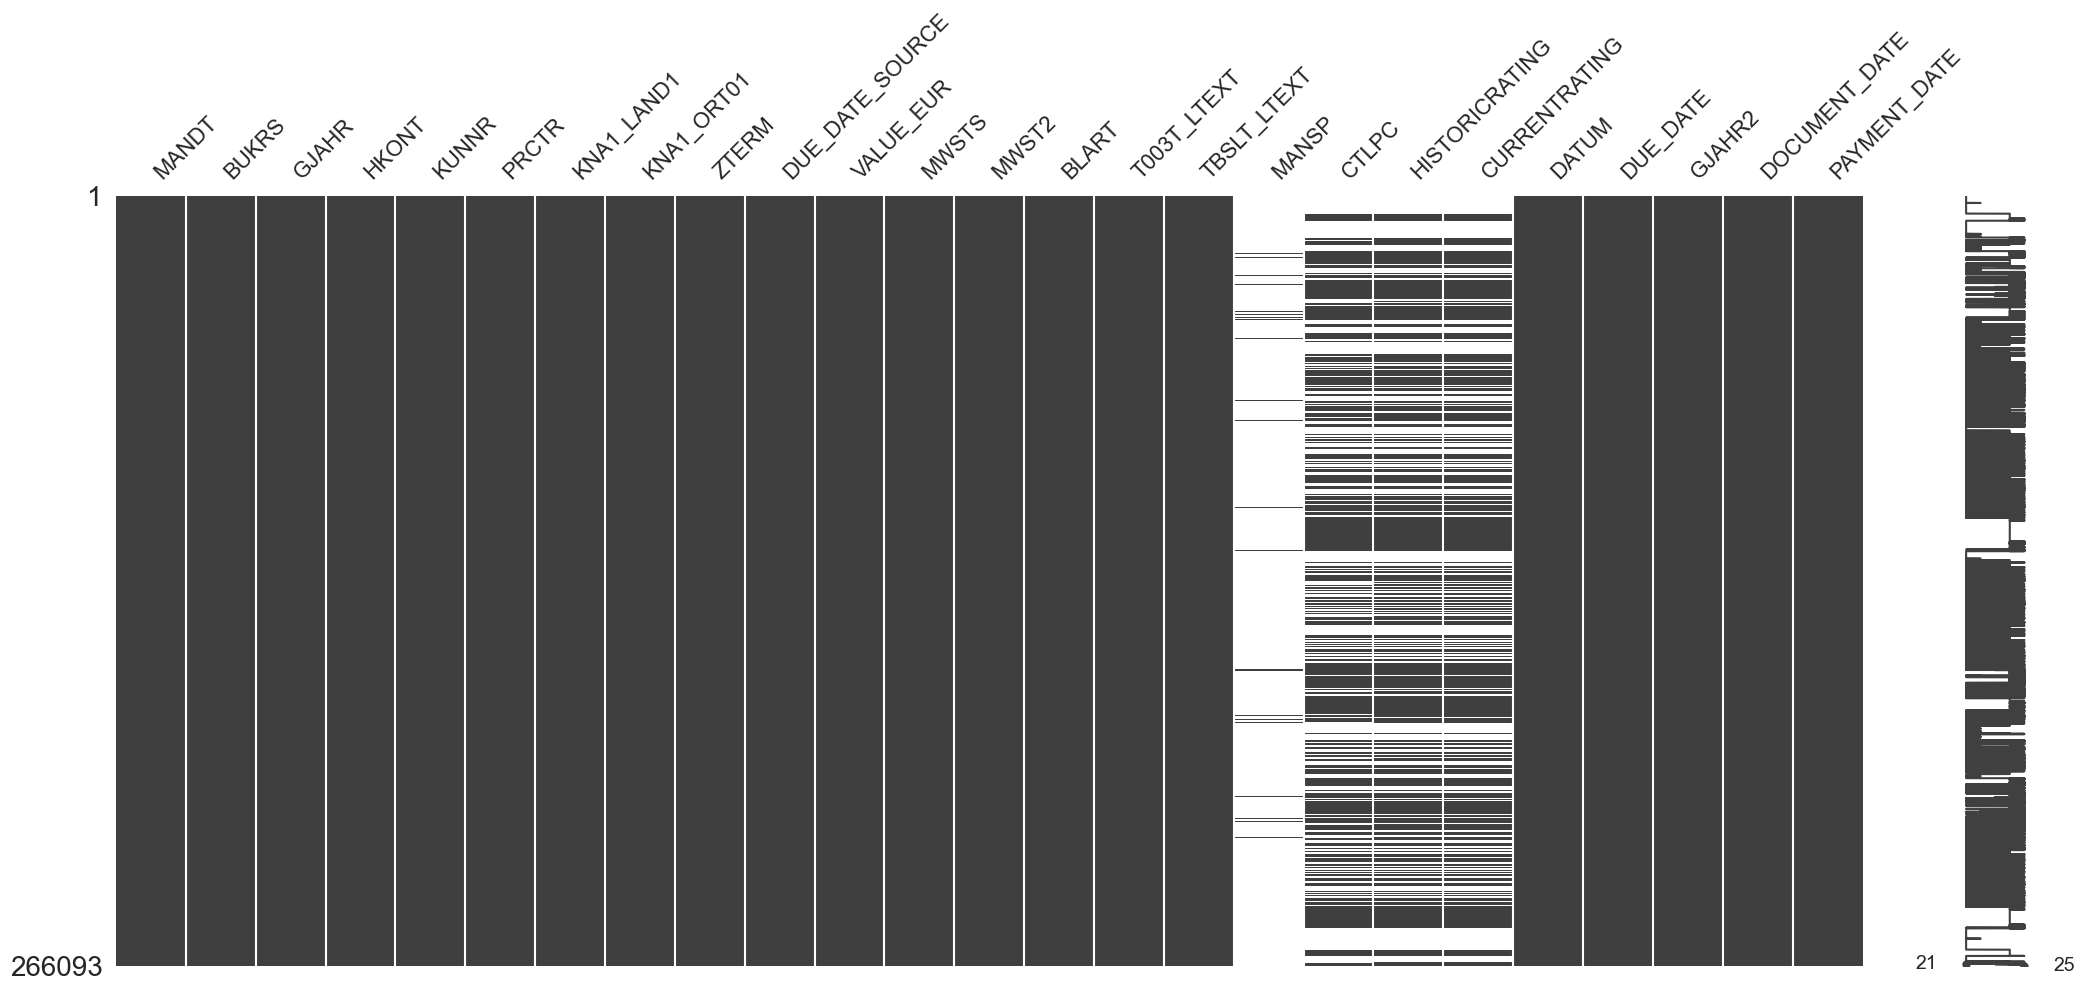

In [4]:
# quick visual check with missing data status
ms.matrix(data)

# observation: no missing data (nan value may still there) in columns except MANSP, CTLPC, HISTORICRATING, CURRENTRATING

In [5]:
# getting basic description of given data
data.describe()

,MANDT,BUKRS,GJAHR,HKONT,KUNNR,PRCTR,ZTERM,VALUE_EUR,MWSTS,MWST2,CTLPC,GJAHR2,DOCUMENT_DATE,PAYMENT_DATE
count,266093.0,266093.000000,266093.000000,266093.000000,266093.000000,266093.000000,266093.000000,266093.000000,2.660930e+05,266093.0,153913.000000,266093.000000,2.660930e+05,2.660930e+05
mean,310.0,3.049047,2018.347901,4.939735,9589.260105,91.102968,55.724314,193.259661,5.524894e+02,0.0,2.362192,2017.503279,1.532360e+15,2.018235e+07
std,0.0,1.841819,0.476305,2.712330,6401.648935,75.243698,32.095698,1473.405854,1.238005e+04,0.0,0.672247,1.710152,1.378414e+13,5.378721e+03
min,310.0,0.000000,2018.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.0,0.000000,2015.000000,1.491178e+15,2.017100e+07
25%,310.0,1.000000,2018.000000,5.000000,4008.000000,30.000000,29.000000,10.000000,0.000000e+00,0.0,2.000000,2016.000000,1.519862e+15,2.018031e+07
50%,310.0,3.000000,2018.000000,5.000000,9103.000000,80.000000,33.000000,33.000000,0.000000e+00,0.0,2.000000,2018.000000,1.533082e+15,2.018080e+07
75%,310.0,5.000000,2019.000000,5.000000,15359.000000,142.000000,89.000000,100.000000,0.000000e+00,0.0,3.000000,2019.000000,1.546387e+15,2.019010e+07
max,310.0,5.000000,2019.000000,13.000000,23823.000000,229.000000,154.000000,301241.000000,1.750000e+06,0.0,10.000000,2020.000000,1.561939e+15,2.019092e+07


In [6]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266093 entries, 0 to 266092
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MANDT            266093 non-null  int64  
 1   BUKRS            266093 non-null  int64  
 2   GJAHR            266093 non-null  int64  
 3   HKONT            266093 non-null  int64  
 4   KUNNR            266093 non-null  int64  
 5   PRCTR            266093 non-null  int64  
 6   KNA1_LAND1       266093 non-null  object 
 7   KNA1_ORT01       266093 non-null  object 
 8   ZTERM            266093 non-null  int64  
 9   DUE_DATE_SOURCE  266093 non-null  object 
 10  VALUE_EUR        266093 non-null  int64  
 11  MWSTS            266093 non-null  float64
 12  MWST2            266093 non-null  float64
 13  BLART            266093 non-null  object 
 14  T003T_LTEXT      266093 non-null  object 
 15  TBSLT_LTEXT      266093 non-null  object 
 16  MANSP            7619 non-null    obje

In [7]:
# checking HKONT unique value

hkont_unique = data.HKONT.unique()
print(hkont_unique)

# observation: 14 different HKONT

[11  5 10  4 13  7  6  9  1  3  2 12  8  0]


In [8]:
# selecting DATUM column for dates
data['DATUM'] = pd.to_datetime(data['DATUM'])

data['DATUM_MONTH'] = data['DATUM'].dt.month
data['DATUM_YEAR'] = data['DATUM'].dt.year

data_agg = data.groupby([data['HKONT'], data['DATUM_YEAR'], data['DATUM_MONTH']])['VALUE_EUR'].sum().reset_index()
data_agg['DATUM_AGG'] = pd.to_datetime(data_agg['DATUM_YEAR'].astype(str) + '-' + 
                                       data_agg['DATUM_MONTH'].astype(str) + '-1')

display(data_agg)

,HKONT,DATUM_YEAR,DATUM_MONTH,VALUE_EUR,DATUM_AGG
0,0,2018,11,312,2018-11-01
1,0,2018,12,53,2018-12-01
2,1,2017,10,1941,2017-10-01
3,1,2017,11,64266,2017-11-01
4,1,2017,12,225295,2017-12-01
...,...,...,...,...,...
244,13,2019,3,654871,2019-03-01
245,13,2019,4,390497,2019-04-01
246,13,2019,5,45899,2019-05-01
247,13,2019,6,963,2019-06-01


## TS selection and visualization

In [9]:
# checking time-series length
hkont_ts = (data_agg.HKONT.value_counts(ascending=False)).to_dict()
hkont_ts = {key: value for key, value in hkont_ts.items() if value > 12}
print(hkont_ts)

# observation: for HKONT 0 and 8 time series has only 2 points. Not sufficient for prediction
#              selected time series with more than 12 months data points

{5: 28, 4: 24, 1: 22, 13: 22, 7: 21, 11: 21, 6: 20, 9: 20, 2: 19, 10: 19, 3: 18}


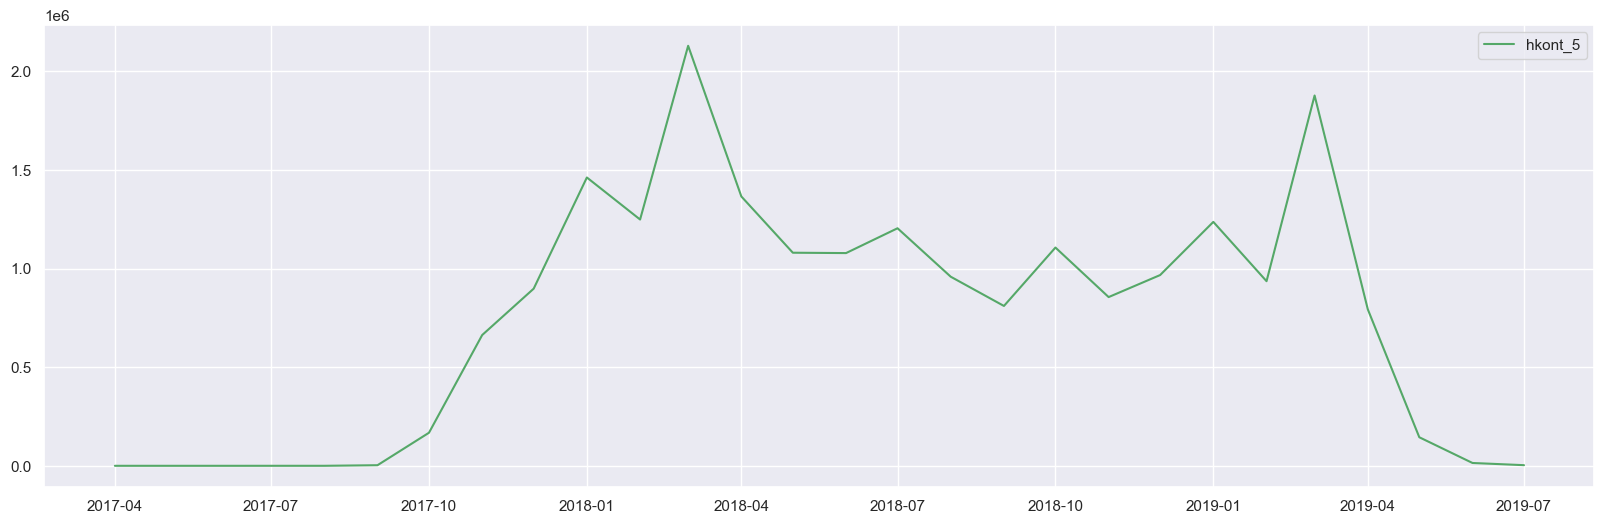

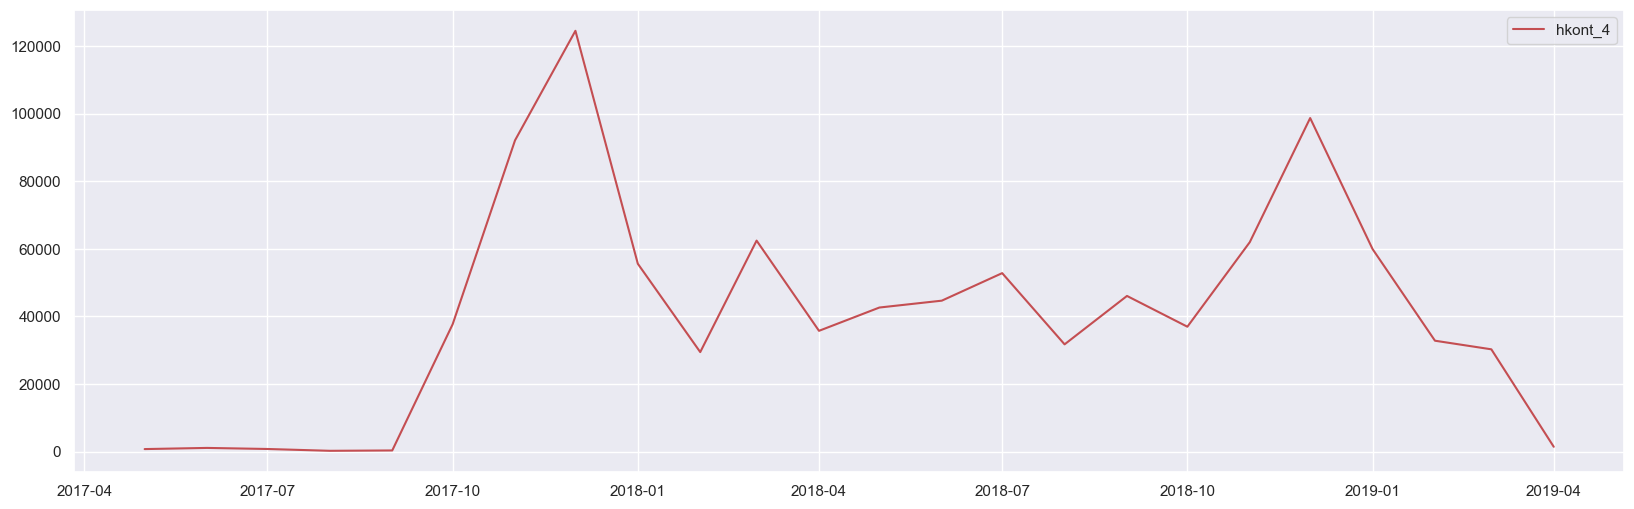

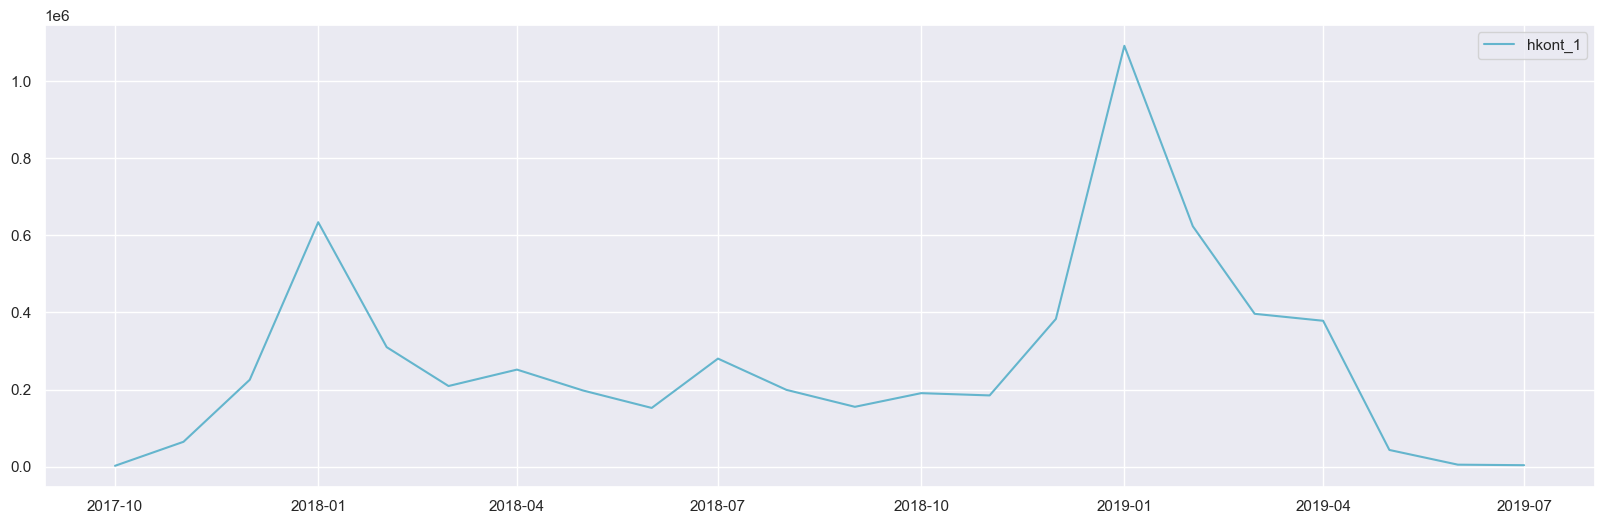

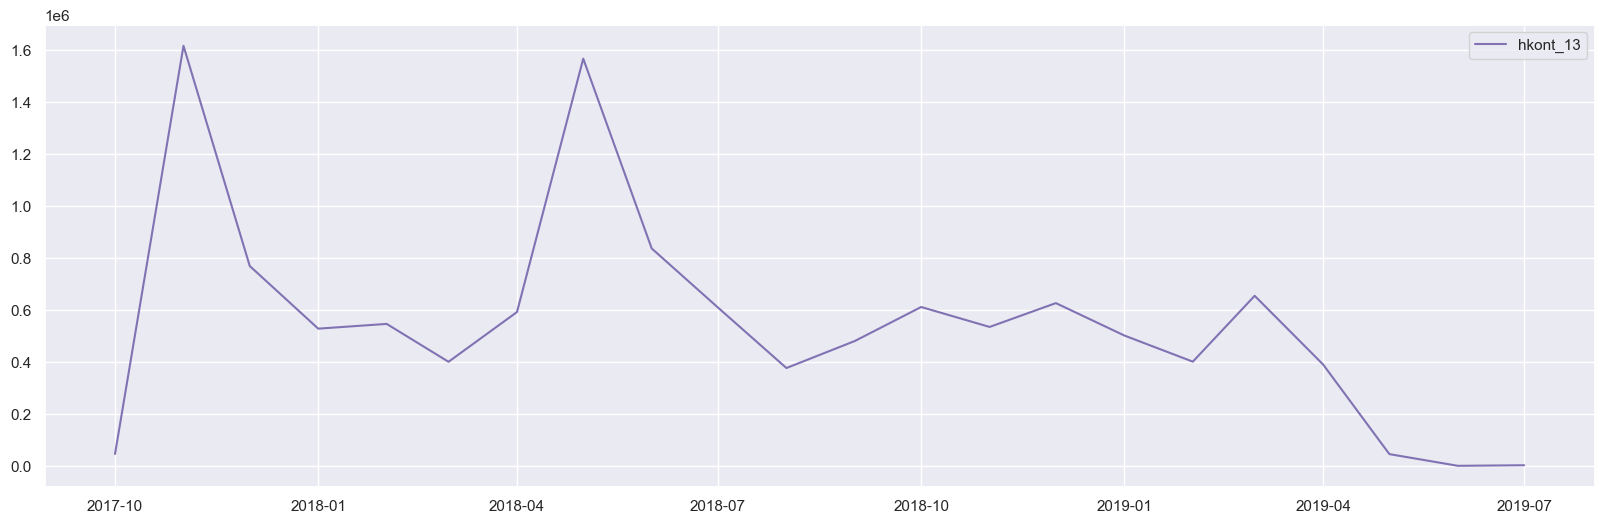

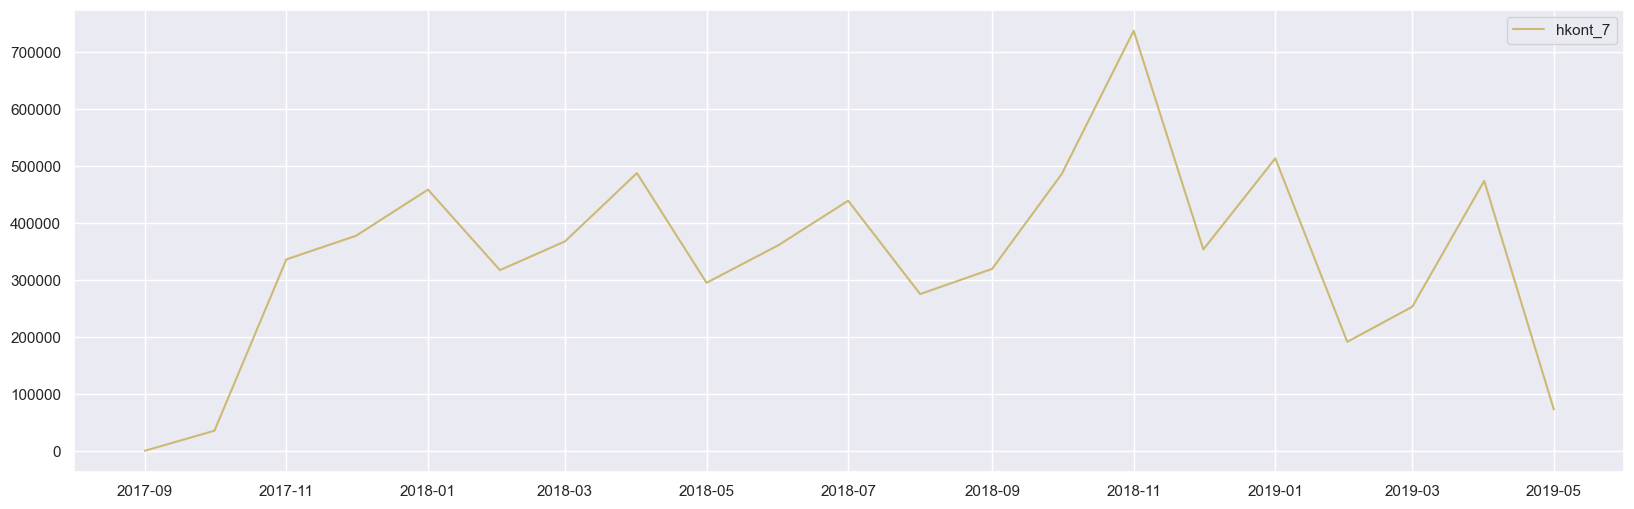

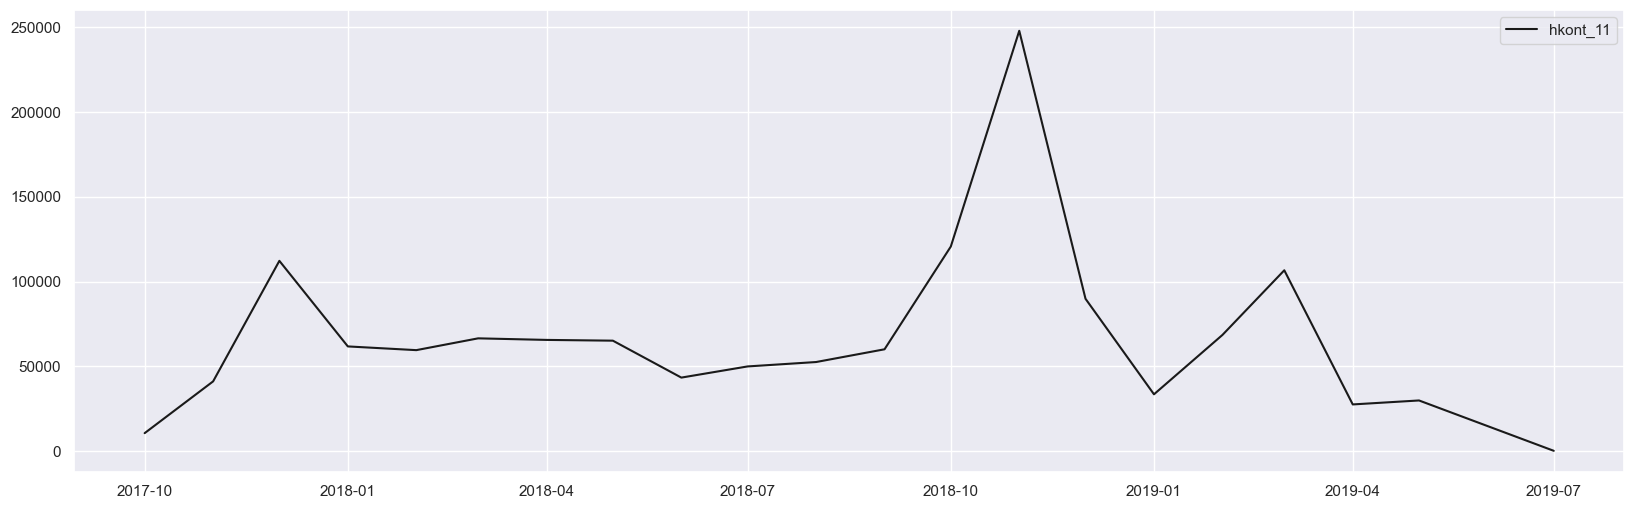

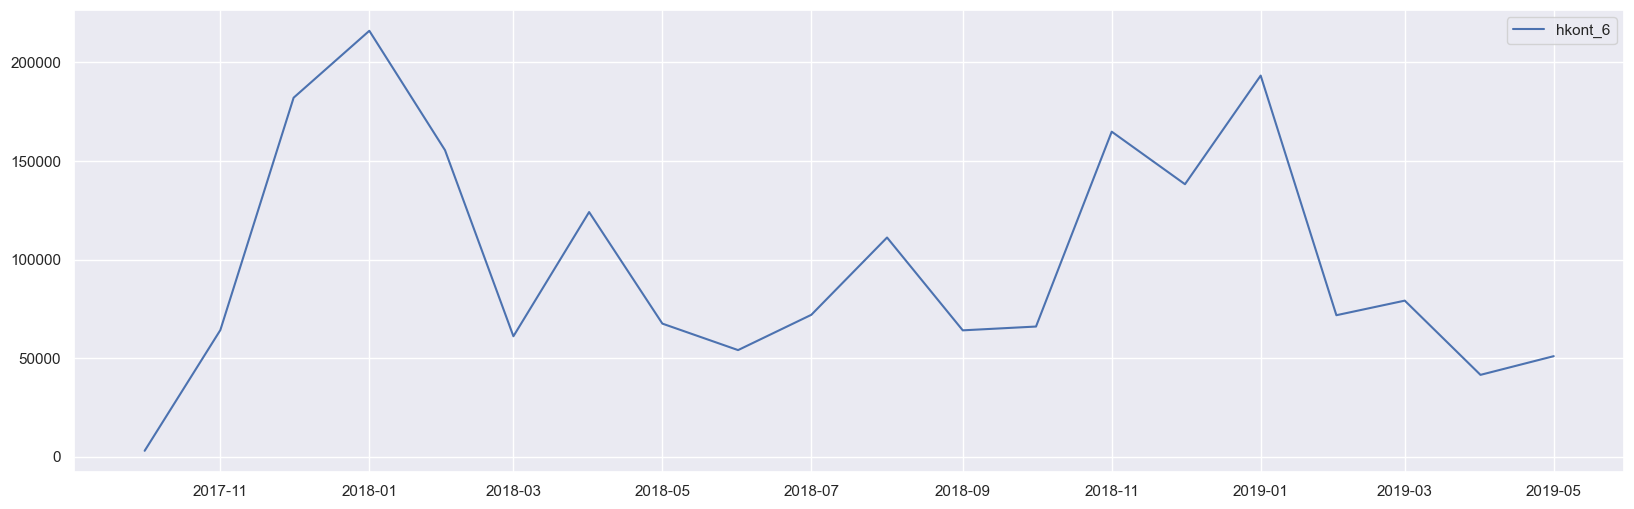

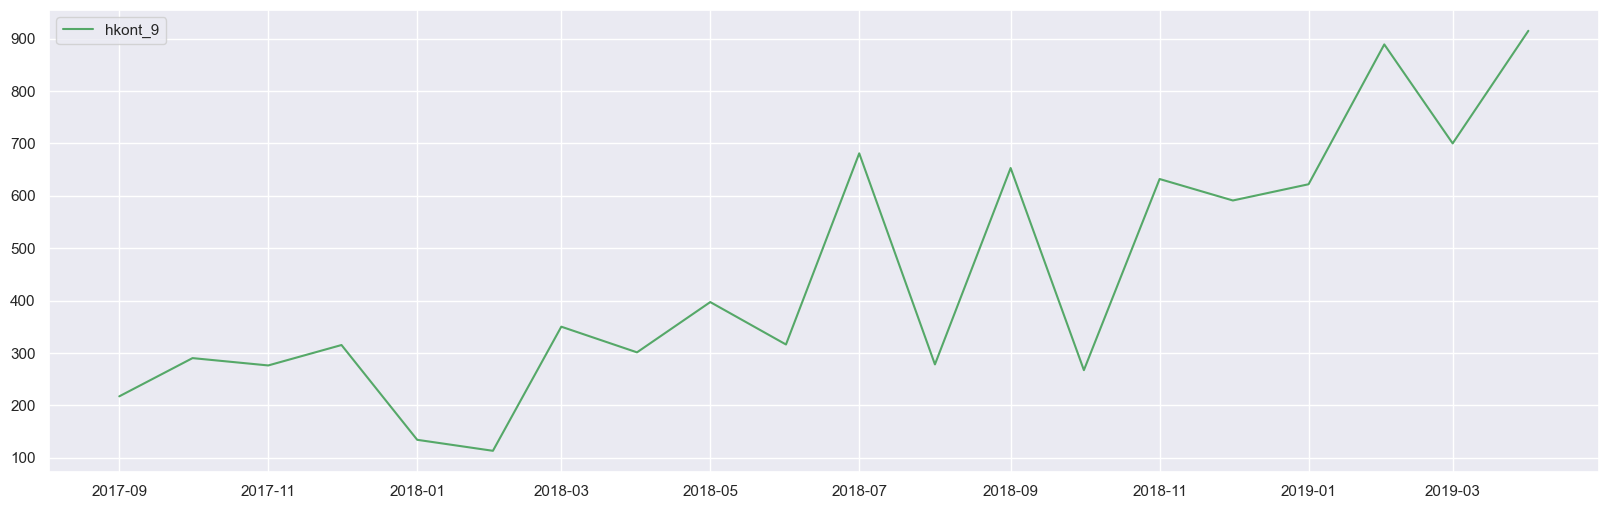

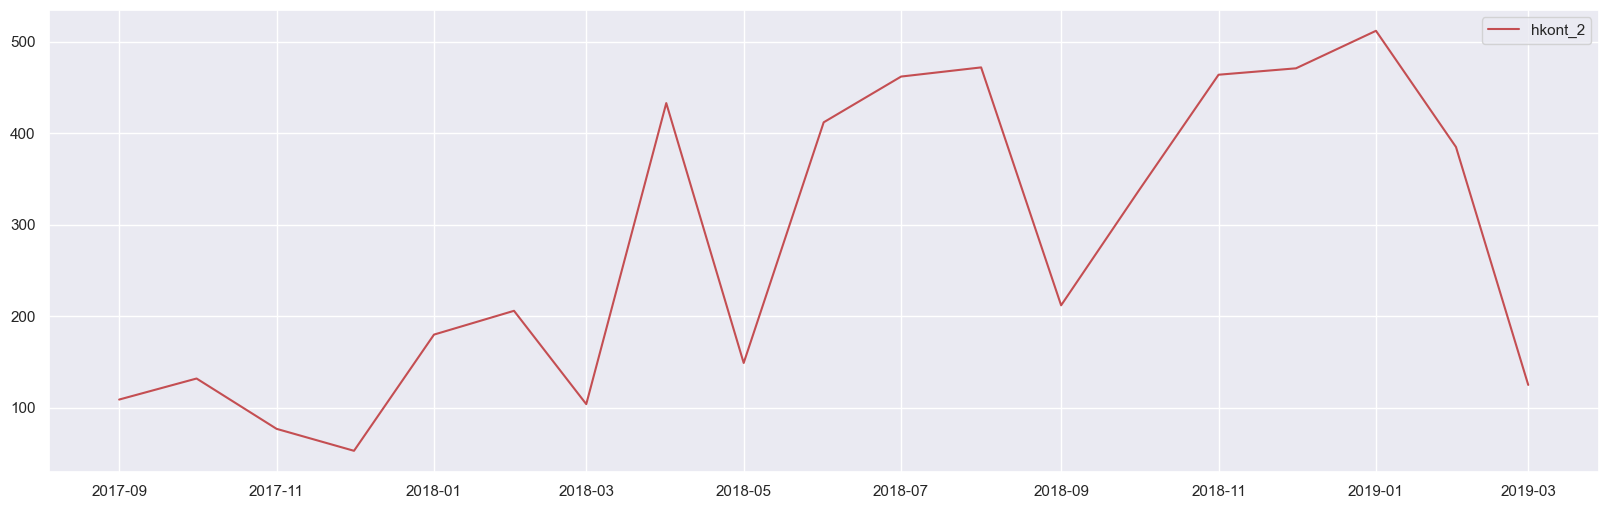

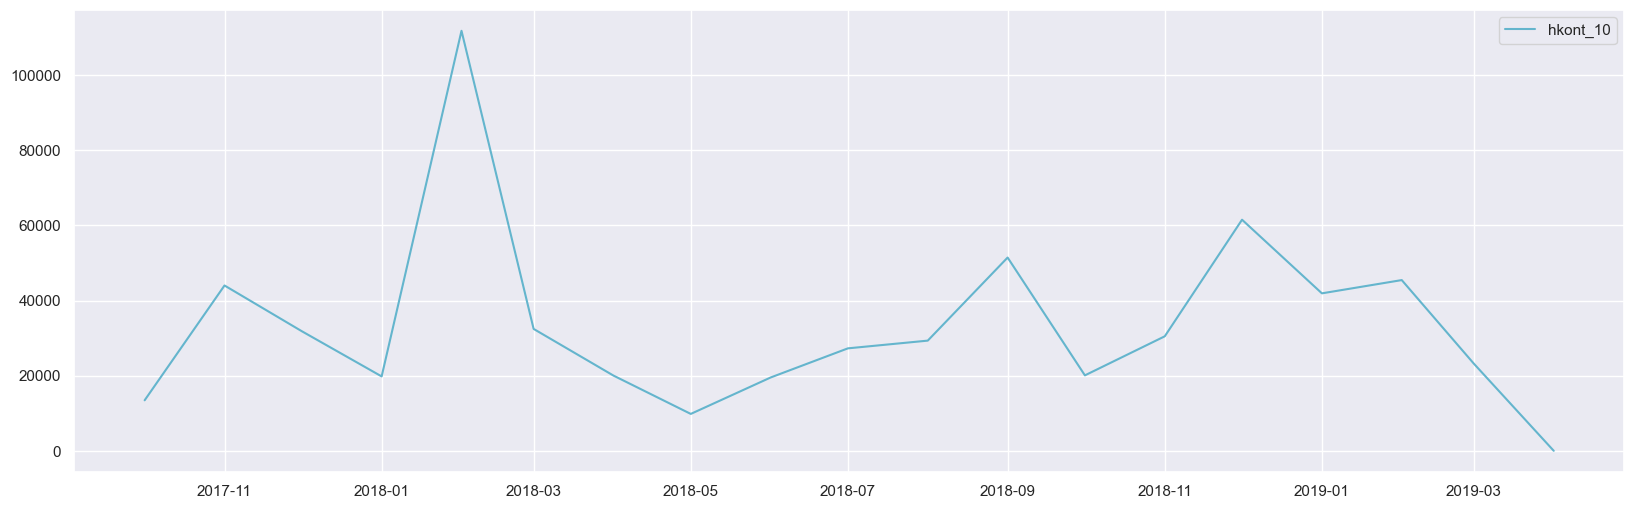

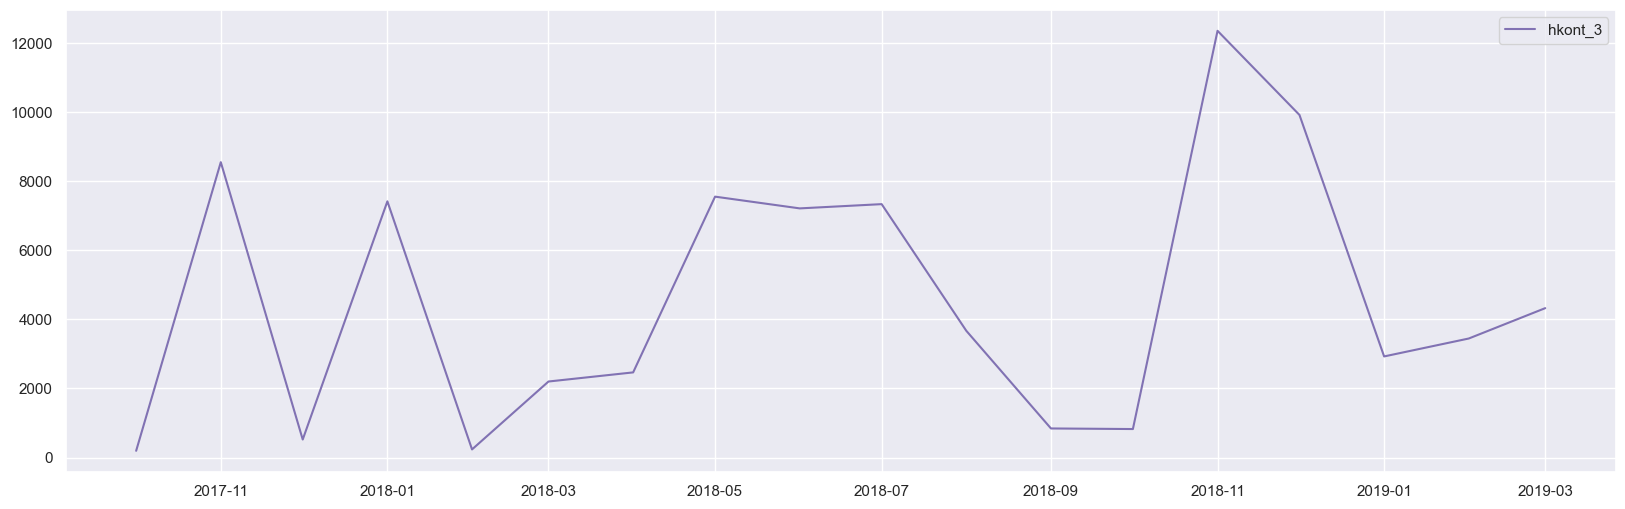

In [10]:
# plotting graphs with loop
def plot_time_hkont_time_series(df):
    hkont_ts = (data_agg.HKONT.value_counts(ascending=False)).to_dict()
    hkont_ts = {key: value for key, value in hkont_ts.items() if value > 12}
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    color_index=0
    for i in hkont_ts:
        data = df['HKONT'] == i
        plt.figure(figsize=(20, 6))
        color_index = (color_index + 1) % len(colors)
        plt.plot(df[data]['DATUM_AGG'], df[data]['VALUE_EUR'], label=f'hkont_{i}', color=colors[color_index])
        plt.legend()
    plt.show()

plot_time_hkont_time_series(data_agg)

## checking seasonality of TS

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonal_decompose_check(df, dict):
    try:
        for i in dict.keys():
            data = df[df['HKONT']==i]
            data.set_index('DATUM_AGG', inplace=True)
            result = seasonal_decompose(data['VALUE_EUR'])
            return result
    except Exception as err:
        print(err)

result = seasonal_decompose_check(data_agg, hkont_ts)

# to check decomposition more than 24 points required per hkont. only one case found.

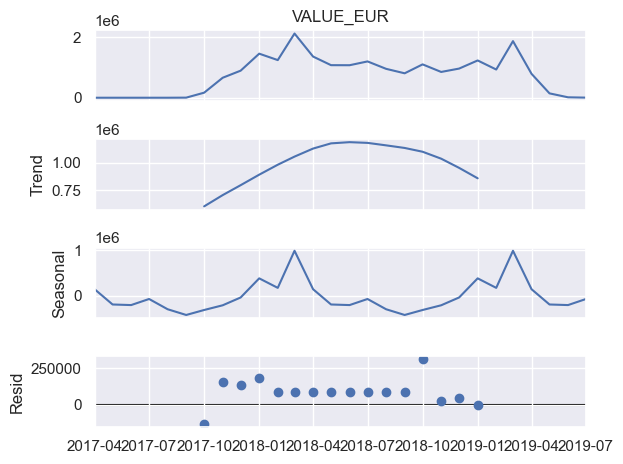

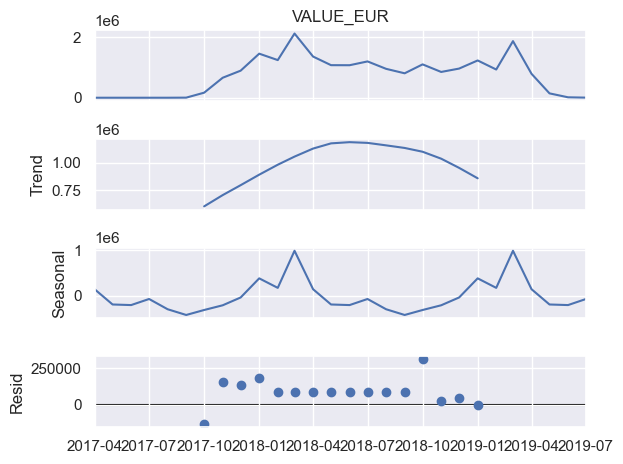

In [12]:
result.plot()

/Users/nirmal/Documents/np_dsci_codes/.venv/lib/python3.11/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


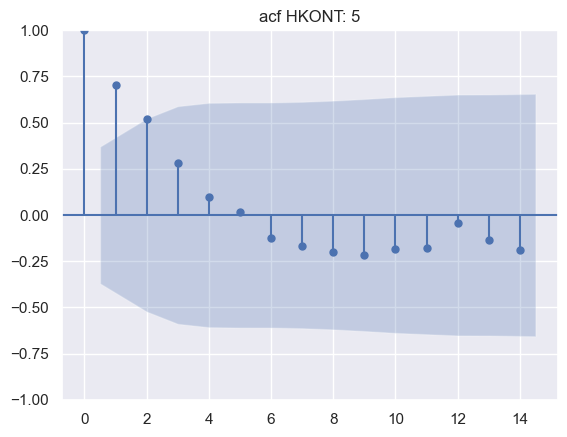

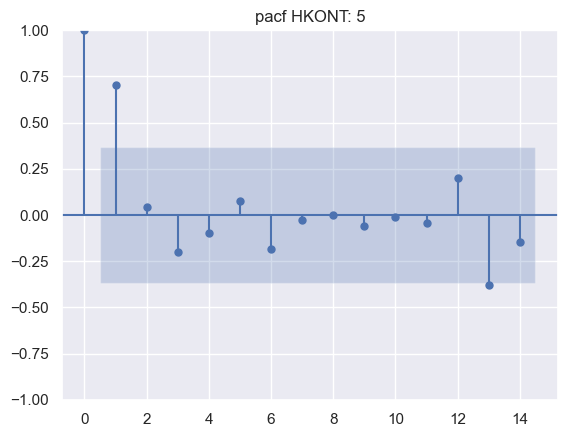

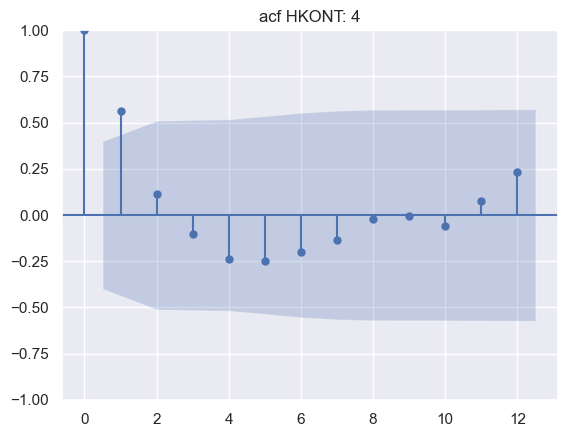

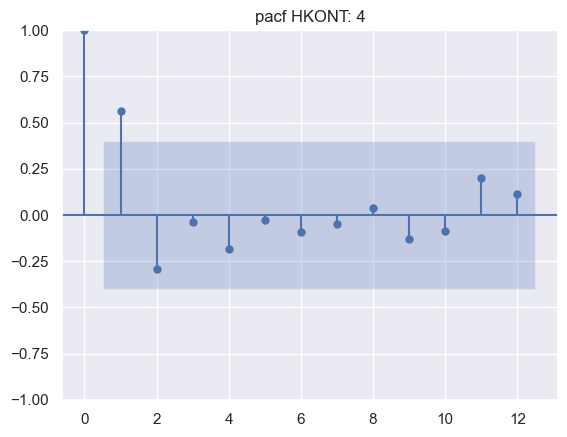

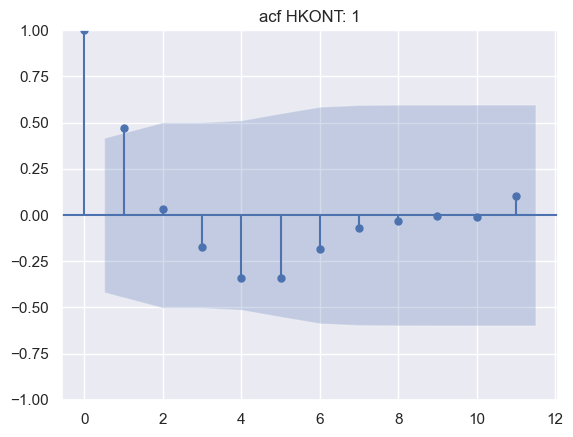

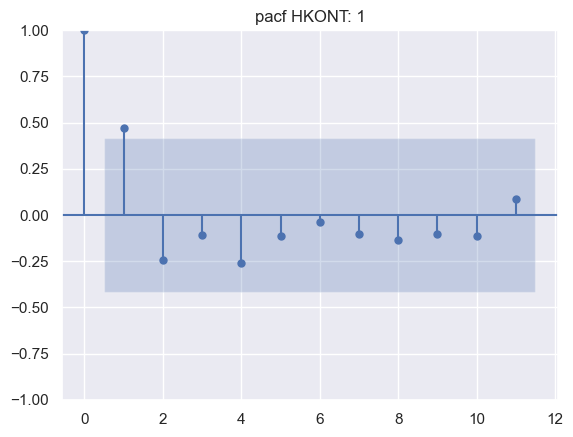

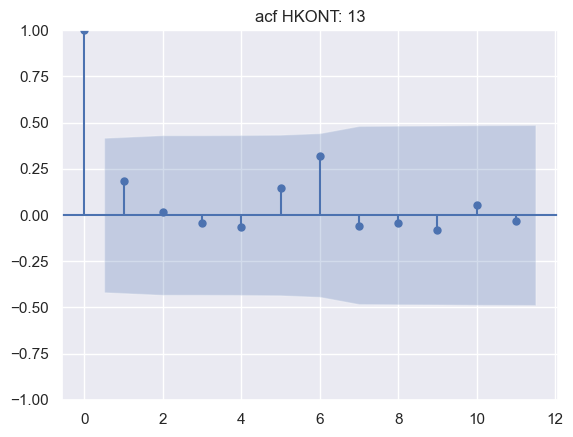

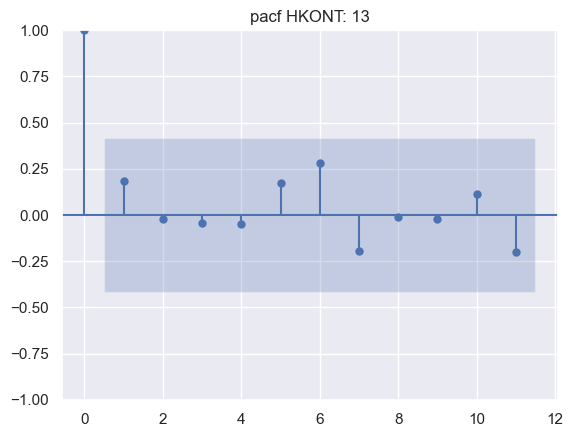

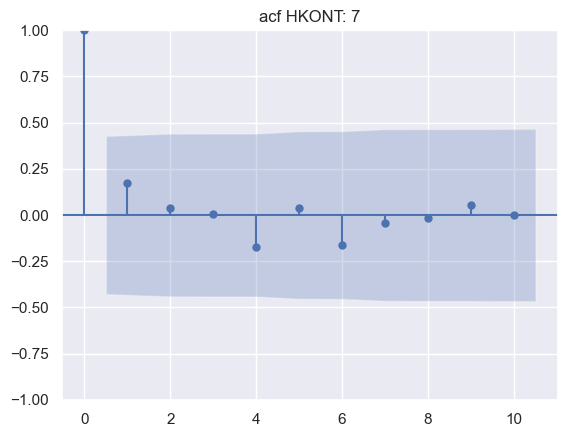

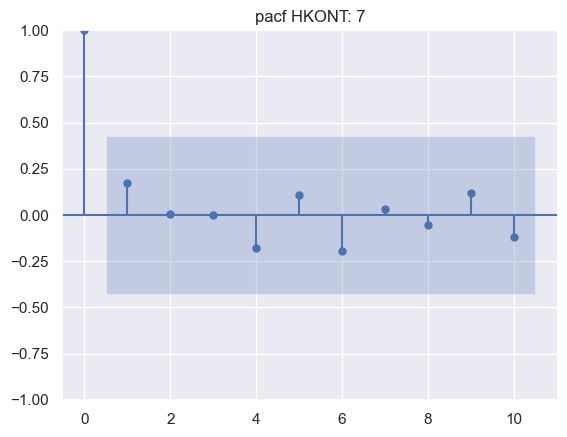

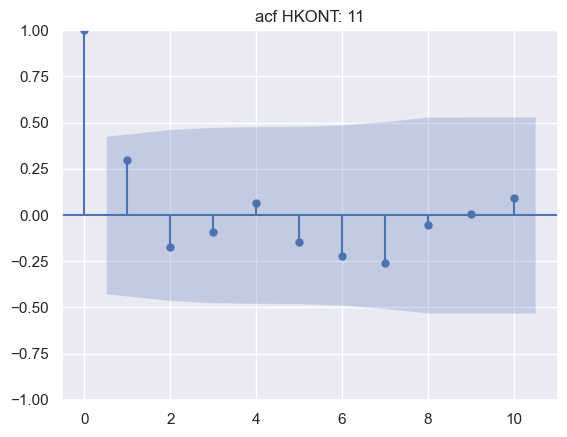

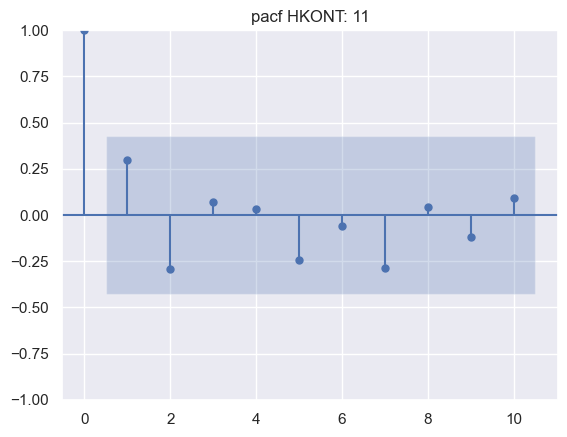

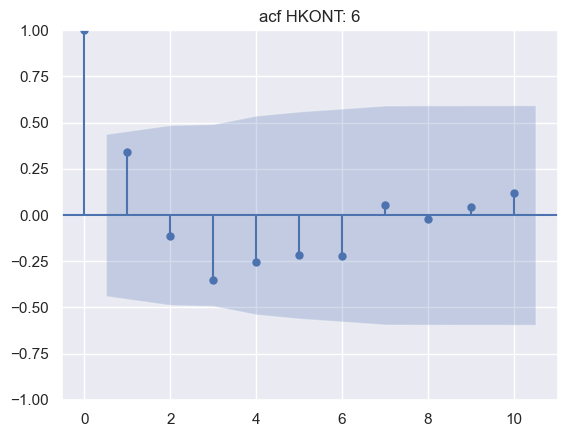

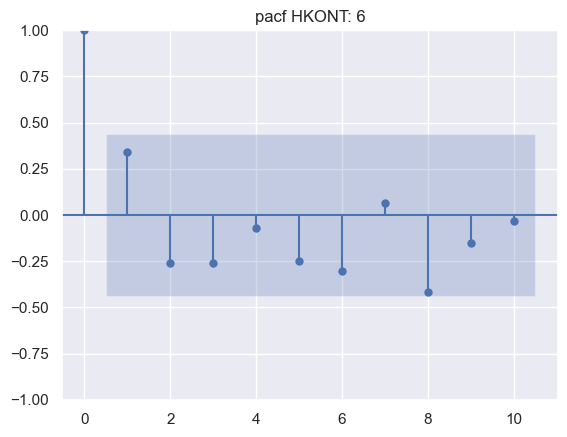

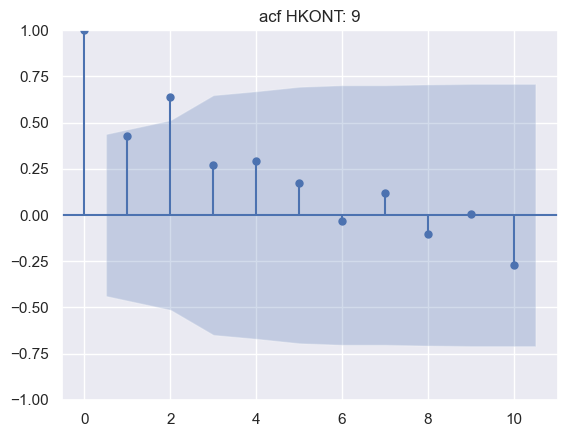

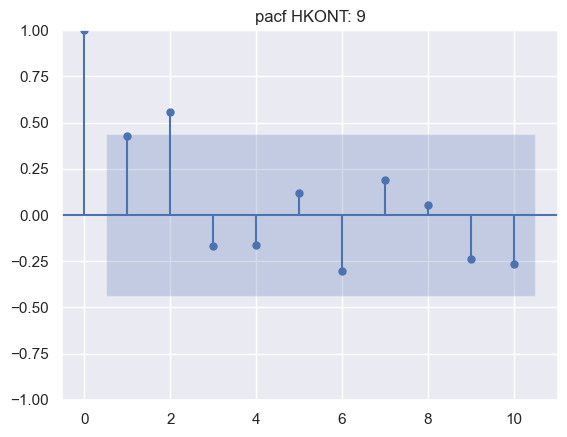

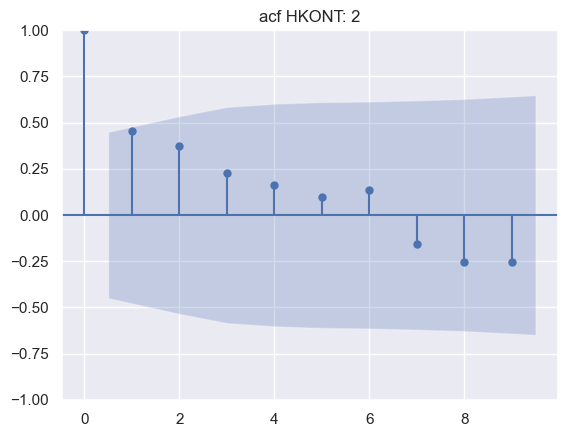

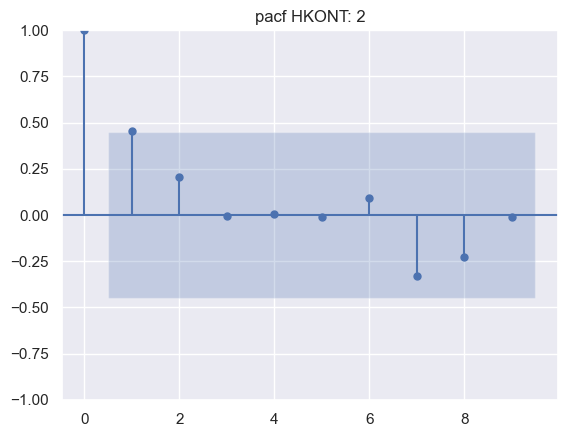

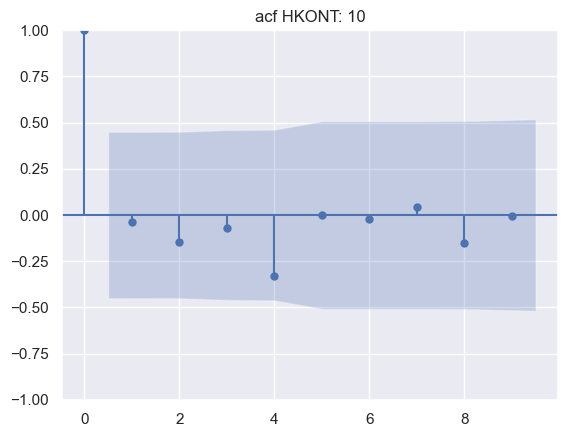

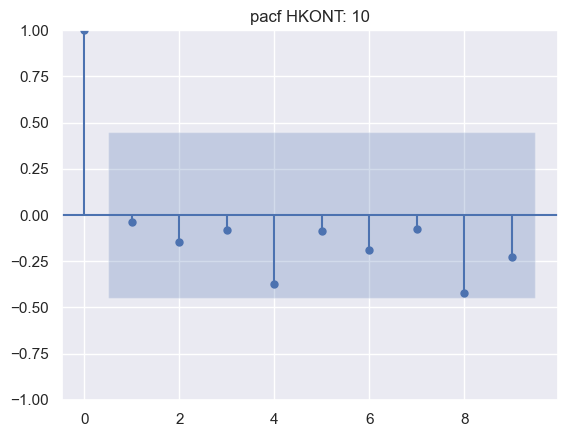

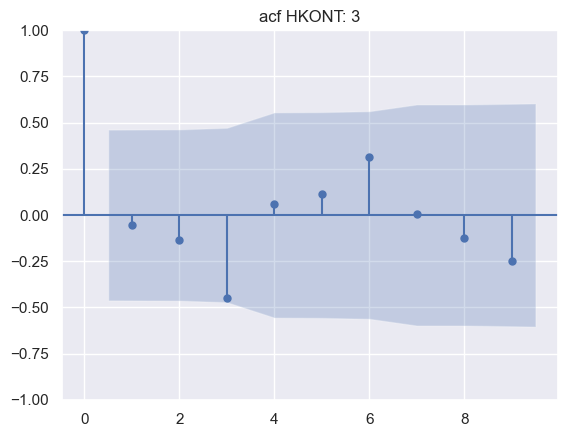

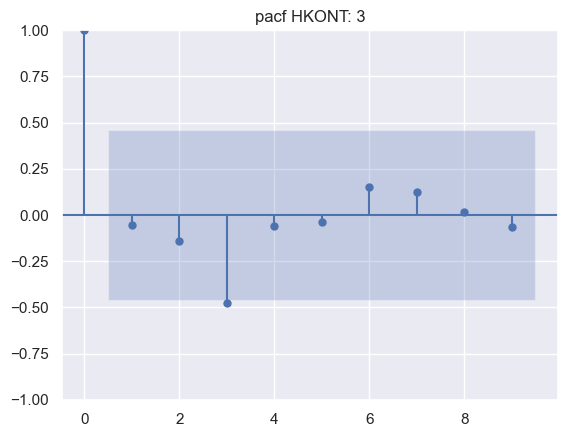

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def acf_pacf_check(df, dict):
    # df.set_index(df['DATUM_AGG'], inplace=True)
    try:
        for i in dict.keys():
            data = df[df['HKONT']==i]['VALUE_EUR']
            plot_acf(data, title=f'acf HKONT: {i}')
            plot_pacf(data, title=f'pacf HKONT: {i}')
            print()

    except Exception as err:
        print(err)

acf_pacf_check(data_agg, hkont_ts)

In [14]:
data_agg

,HKONT,DATUM_YEAR,DATUM_MONTH,VALUE_EUR,DATUM_AGG
0,0,2018,11,312,2018-11-01
1,0,2018,12,53,2018-12-01
2,1,2017,10,1941,2017-10-01
3,1,2017,11,64266,2017-11-01
4,1,2017,12,225295,2017-12-01
...,...,...,...,...,...
244,13,2019,3,654871,2019-03-01
245,13,2019,4,390497,2019-04-01
246,13,2019,5,45899,2019-05-01
247,13,2019,6,963,2019-06-01


In [15]:
data_agg1 = data_agg[['DATUM_AGG', 'HKONT', 'VALUE_EUR']]
data_agg1.columns = ['ds', 'unique_id', 'y']

/Users/nirmal/Documents/np_dsci_codes/.venv/lib/python3.11/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


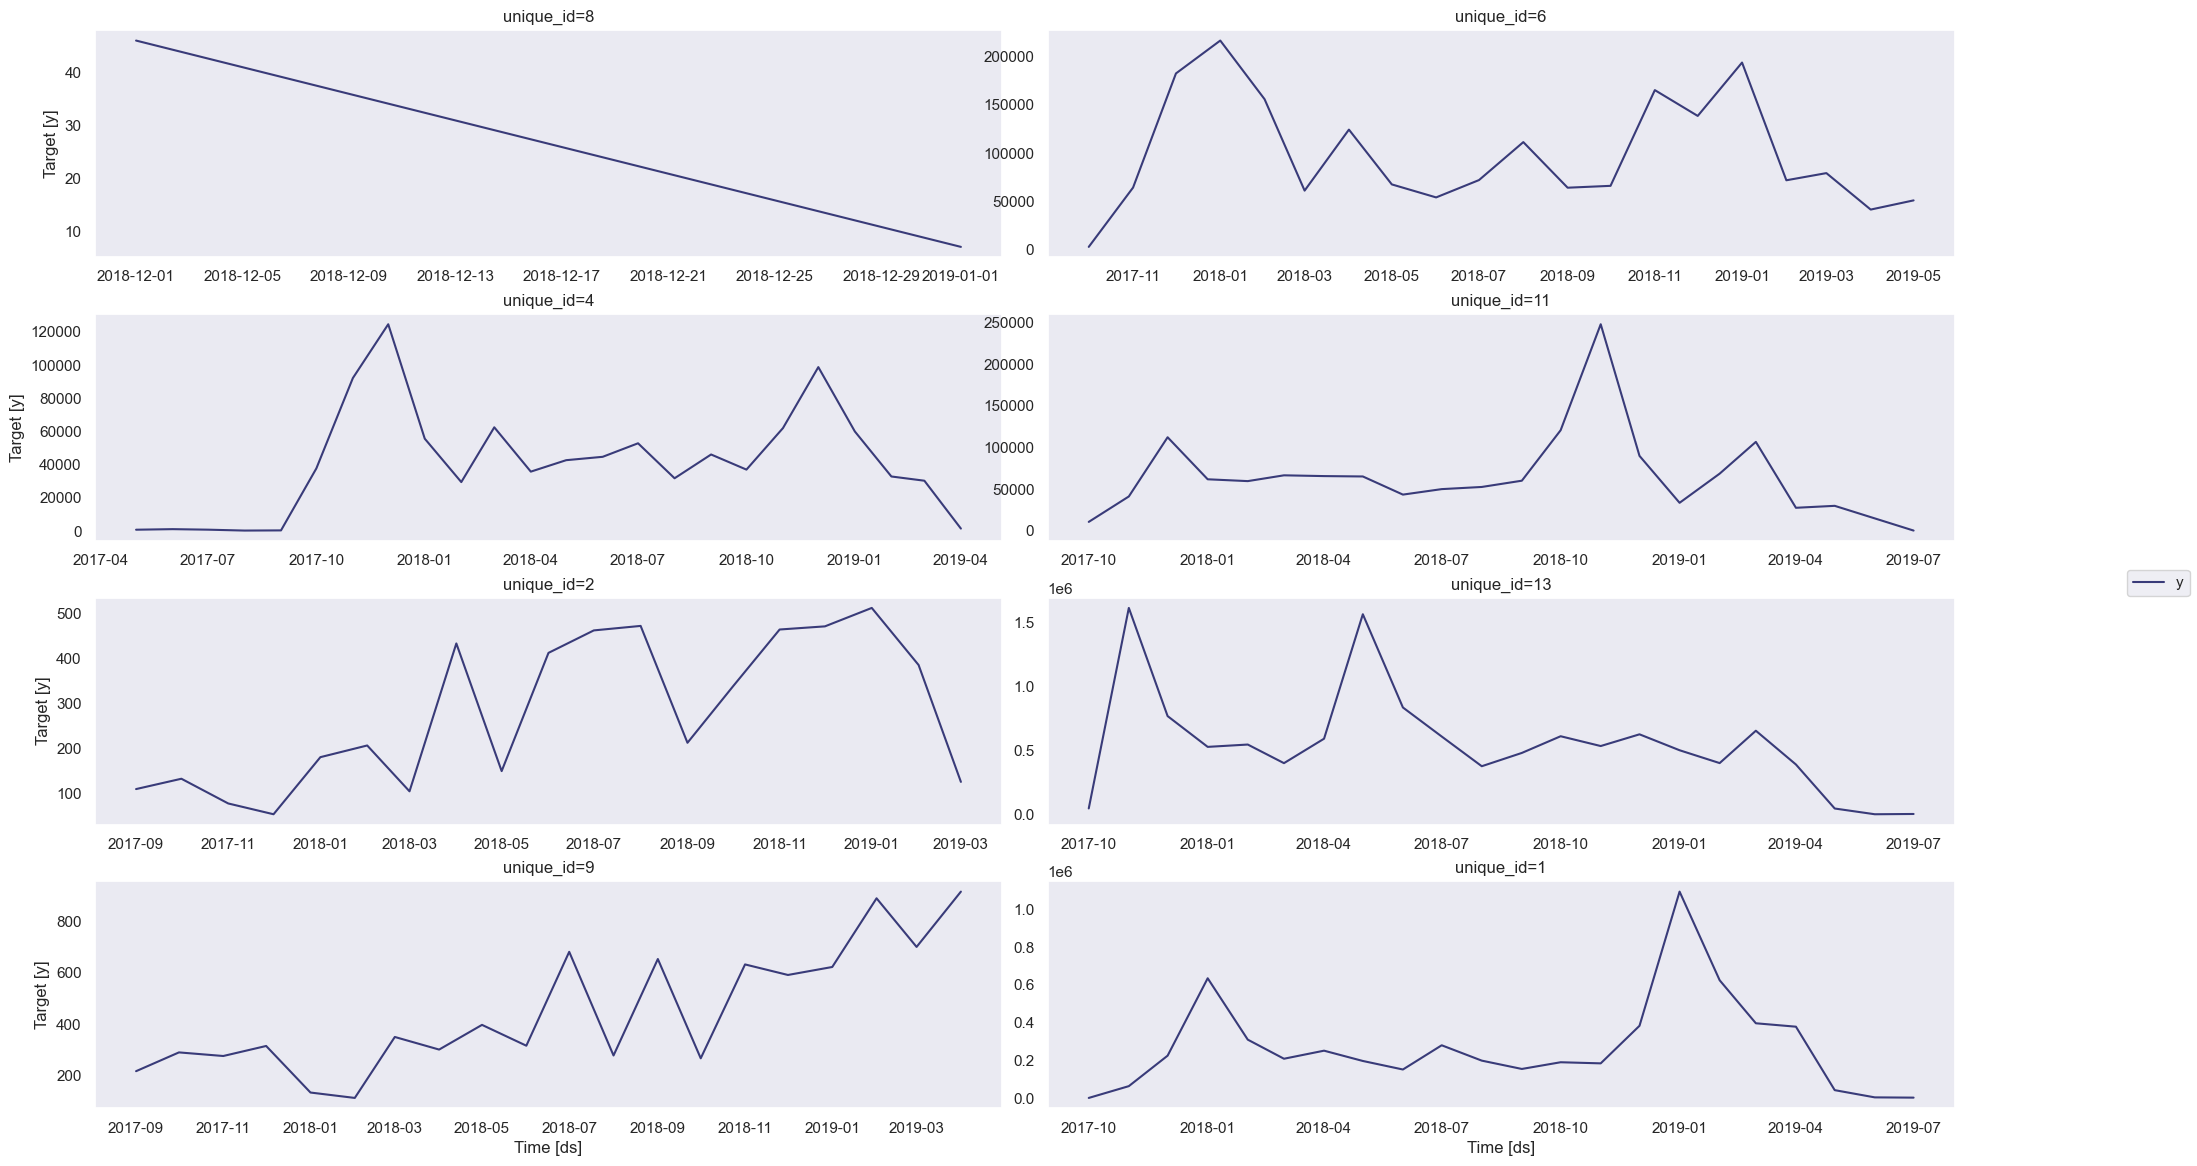

In [16]:
from statsforecast import StatsForecast

StatsForecast.plot(data_agg1)

In [21]:
display(data_agg)

,HKONT,DATUM_YEAR,DATUM_MONTH,VALUE_EUR,DATUM_AGG
0,0,2018,11,312,2018-11-01
1,0,2018,12,53,2018-12-01
2,1,2017,10,1941,2017-10-01
3,1,2017,11,64266,2017-11-01
4,1,2017,12,225295,2017-12-01
...,...,...,...,...,...
244,13,2019,3,654871,2019-03-01
245,13,2019,4,390497,2019-04-01
246,13,2019,5,45899,2019-05-01
247,13,2019,6,963,2019-06-01
